Week 4 Assignment

Conduct an in-depth Exploratory Data Analysis on a complex dataset. Focus on understanding data distributions, identifying missing values, detecting outliers, and uncovering relationships between variables. Utilize visualizations like histograms, box plots, and heatmaps to support your findings.

Load the Titanic Dataset

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Check Data Summary and Missing Values

In [4]:
# Dataset overview
print("Shape of the dataset:", titanic_data.shape)
print("\nColumns in the dataset:\n", titanic_data.columns)


Shape of the dataset: (891, 15)

Columns in the dataset:
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [5]:
# Data types and summary statistics
print("\nData types:\n", titanic_data.dtypes)



Data types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [8]:
print("\nSummary Statistics:\n")
titanic_data.describe(include='all')


Summary Statistics:



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Check for missing values
print("\nMissing values in each column:\n", titanic_data.isnull().sum())



Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [11]:
print("\nPercentage of missing values in each column:\n", (titanic_data.isnull().sum()/len(titanic_data))*100)


Percentage of missing values in each column:
 survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


Create the heatmap

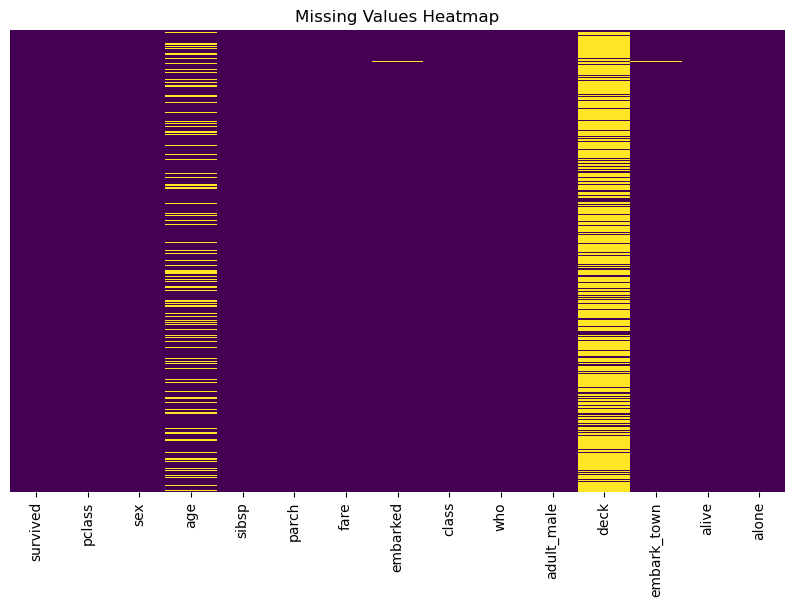

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()


Impute Missing Values

In [13]:
# Import necessary libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Create a copy to avoid modifying the original DataFrame
titanic_data_filled = titanic_data.copy()

# Separate numerical and categorical columns
numerical_cols = titanic_data_filled.select_dtypes(include=['number']).columns
categorical_cols = titanic_data_filled.select_dtypes(exclude=['number']).columns

# Use IterativeImputer for numerical features
imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
titanic_data_filled[numerical_cols] = imputer_num.fit_transform(titanic_data_filled[numerical_cols])

# Fill categorical features with the mode (most frequent value)
for col in categorical_cols:
    titanic_data_filled[col] = titanic_data_filled[col].fillna(titanic_data_filled[col].mode()[0])

# Verify if there are any missing values left
print("\nMissing values after imputation:\n", titanic_data_filled.isnull().sum())


Missing values after imputation:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


e:\Anaconda\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Univariate Analysis


Survival Count:
 survived
0.0    549
1.0    342
Name: count, dtype: int64


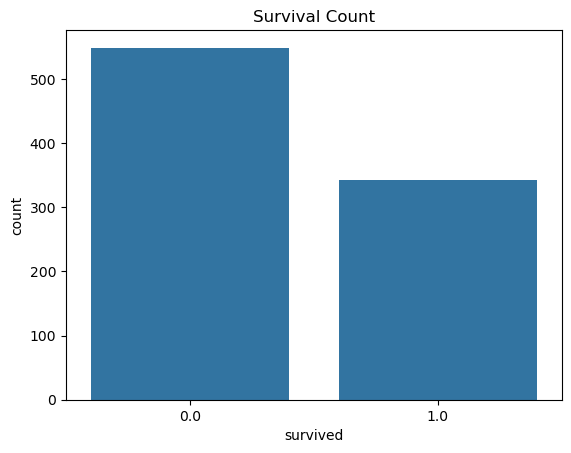


Pclass Distribution:
 pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64


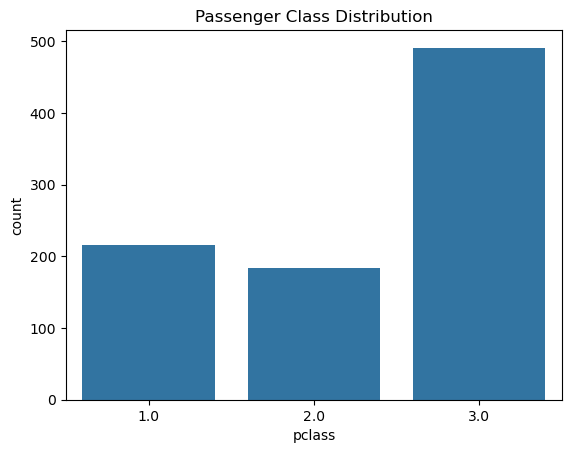


Age Statistics:
 count    891.000000
mean      29.647655
std       13.732631
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: age, dtype: float64


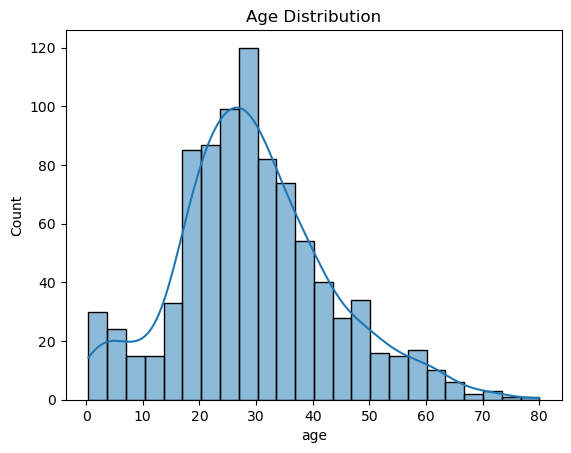


Sex Distribution:
 sex
male      577
female    314
Name: count, dtype: int64


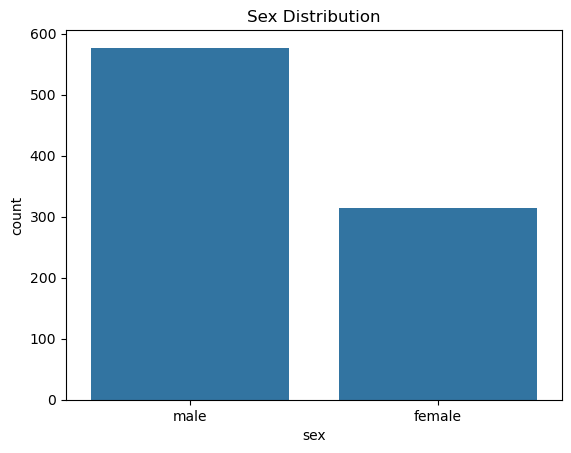

In [14]:
# Analyze 'survived'
print("\nSurvival Count:\n", titanic_data_filled['survived'].value_counts())
sns.countplot(x='survived', data=titanic_data_filled)
plt.title('Survival Count')
plt.show()

# Analyze 'pclass'
print("\nPclass Distribution:\n", titanic_data_filled['pclass'].value_counts())
sns.countplot(x='pclass', data=titanic_data_filled)
plt.title('Passenger Class Distribution')
plt.show()

# Analyze 'age'
print("\nAge Statistics:\n", titanic_data_filled['age'].describe())
sns.histplot(x='age', data=titanic_data_filled, kde=True)
plt.title('Age Distribution')
plt.show()

# Analyze 'sex'
print("\nSex Distribution:\n", titanic_data_filled['sex'].value_counts())
sns.countplot(x='sex', data=titanic_data_filled)
plt.title('Sex Distribution')
plt.show()

Bivariate Analysis


Survival by Gender:
 sex     survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64


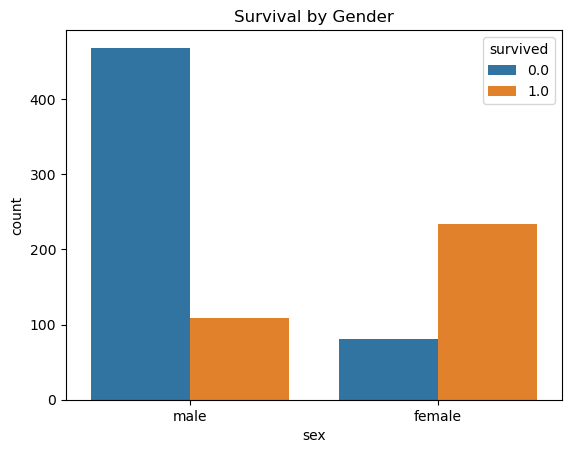


Survival by Passenger Class:
 pclass  survived
1.0     1.0         136
        0.0          80
2.0     0.0          97
        1.0          87
3.0     0.0         372
        1.0         119
Name: count, dtype: int64


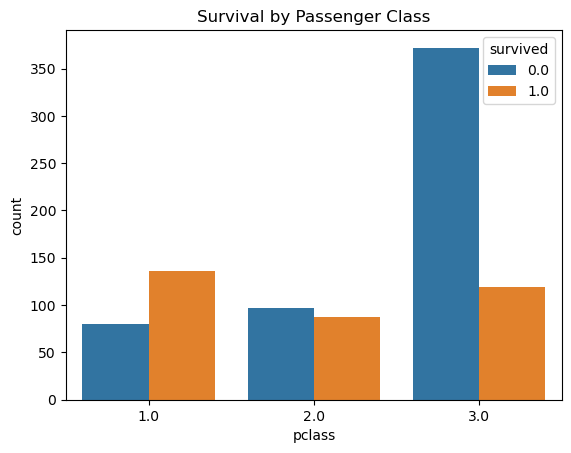

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9336\728102606.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('age_group')['survived'].value_counts())



Survival by Age Group:
 age_group  survived
Child      0.0          80
           1.0          76
Adult      0.0         462
           1.0         265
Senior     0.0           7
           1.0           1
Name: count, dtype: int64


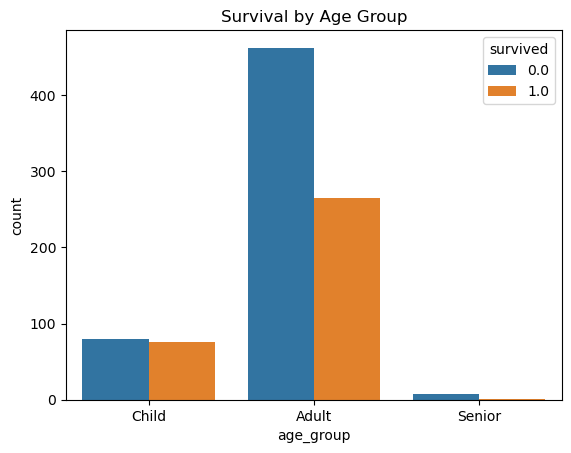


Survival by Gender and Class:
 sex     pclass  survived
female  1.0     1.0          91
                0.0           3
        2.0     1.0          70
                0.0           6
        3.0     0.0          72
                1.0          72
male    1.0     0.0          77
                1.0          45
        2.0     0.0          91
                1.0          17
        3.0     0.0         300
                1.0          47
Name: count, dtype: int64


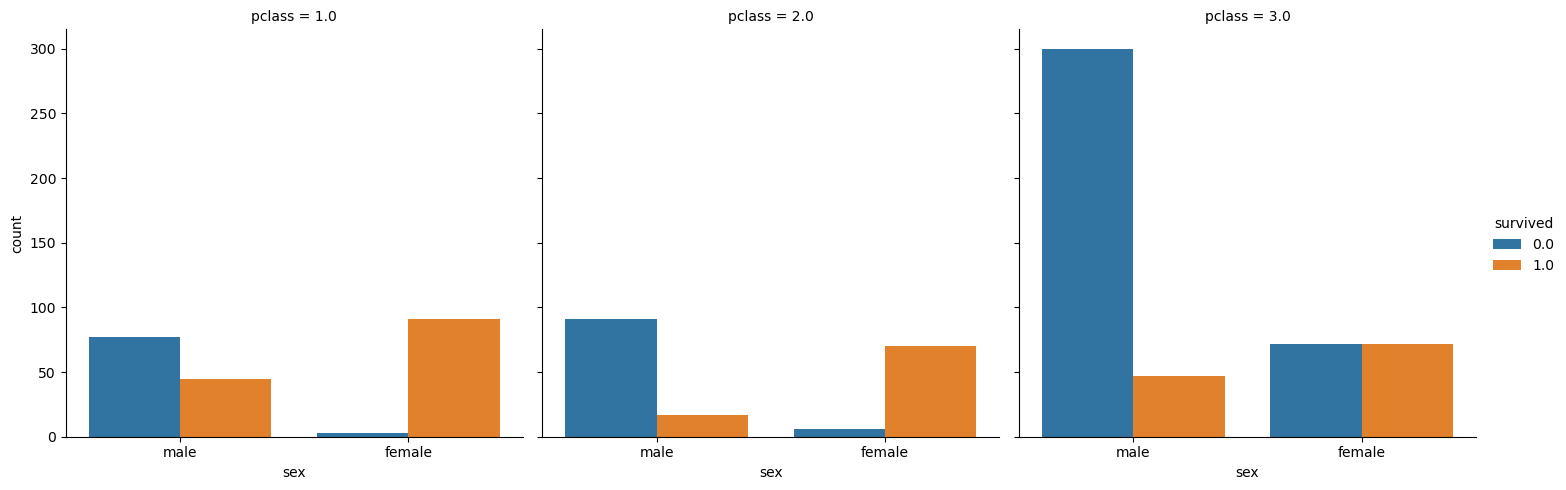

In [15]:
# Analyze survival based on gender
print("\nSurvival by Gender:\n", titanic_data_filled.groupby('sex')['survived'].value_counts())
sns.countplot(x='sex', hue='survived', data=titanic_data_filled)
plt.title('Survival by Gender')
plt.show()

# Analyze survival based on passenger class
print("\nSurvival by Passenger Class:\n", titanic_data_filled.groupby('pclass')['survived'].value_counts())
sns.countplot(x='pclass', hue='survived', data=titanic_data_filled)
plt.title('Survival by Passenger Class')
plt.show()

# Analyze survival based on age groups (create age bins)
titanic_data_filled['age_group'] = pd.cut(titanic_data_filled['age'], bins=[0, 18, 65, 100], labels=['Child', 'Adult', 'Senior'])
print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('age_group')['survived'].value_counts())
sns.countplot(x='age_group', hue='survived', data=titanic_data_filled)
plt.title('Survival by Age Group')
plt.show()

# Further exploration: Analyze survival based on combinations of factors

# Example: Survival based on gender and class
print("\nSurvival by Gender and Class:\n", titanic_data_filled.groupby(['sex', 'pclass'])['survived'].value_counts())
sns.catplot(x='sex', hue='survived', col='pclass', kind='count', data=titanic_data_filled)
plt.show()

Insights from Analysis


Gender: Females had a higher survival rate compared to males.

Class: Passengers in 1st class had better chances of survival.

Age: Younger passengers (children) were more likely to survive.

Survival Analysis

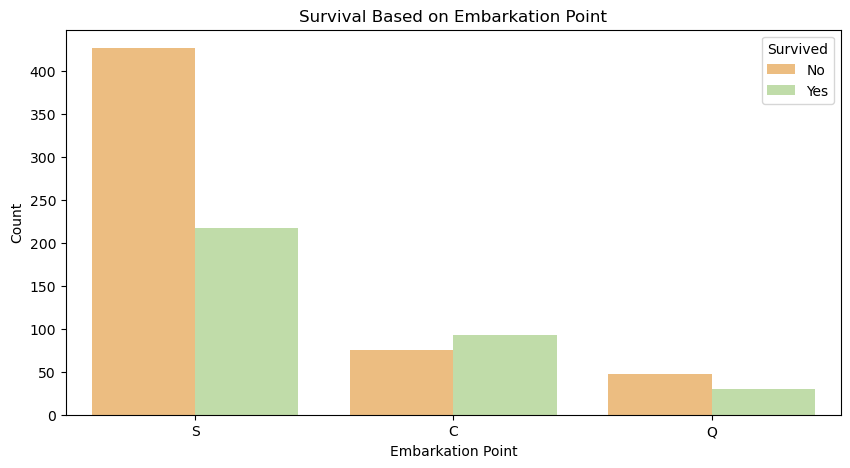

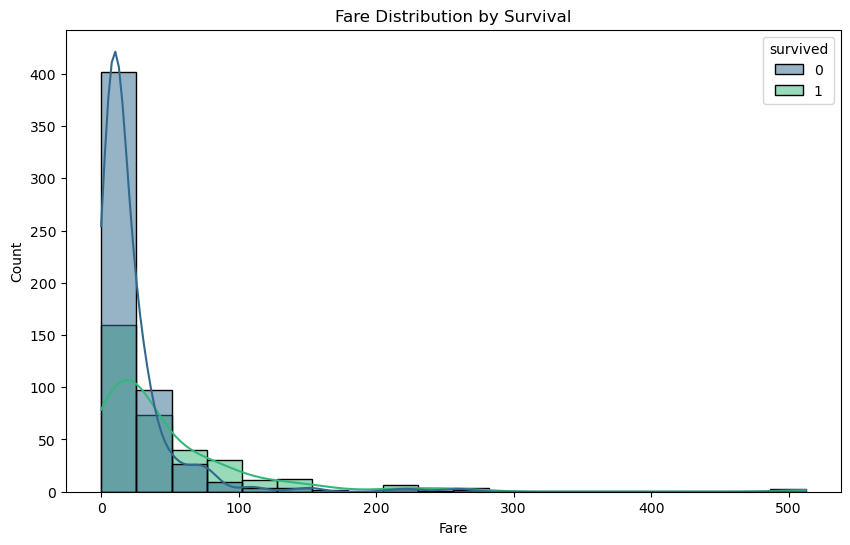

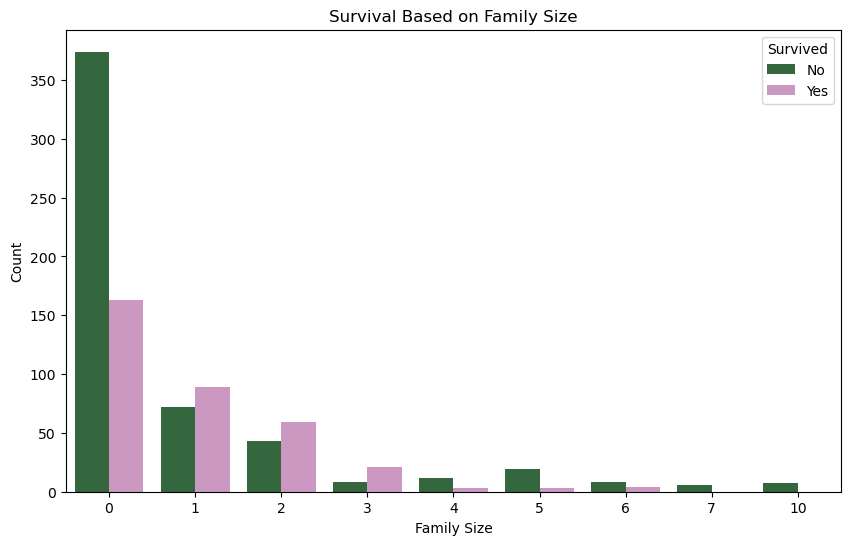

In [16]:
# Survival Based on Embarkation Point
plt.figure(figsize=(10, 5))
sns.countplot(x='embarked', hue='survived', data=titanic_data, palette='Spectral')
plt.title('Survival Based on Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Survival Based on Fare
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data, x='fare', hue='survived', bins=20, kde=True, palette='viridis')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Family Size Analysis
titanic_data['family_size'] = titanic_data['sibsp'] + titanic_data['parch']
plt.figure(figsize=(10, 6))
sns.countplot(x='family_size', hue='survived', data=titanic_data, palette='cubehelix')
plt.title('Survival Based on Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Feature Engineering


Create meaningful features for better insights:

Family Size: Combine sibsp and parch.

Age Group: Categorize passengers into age brackets.

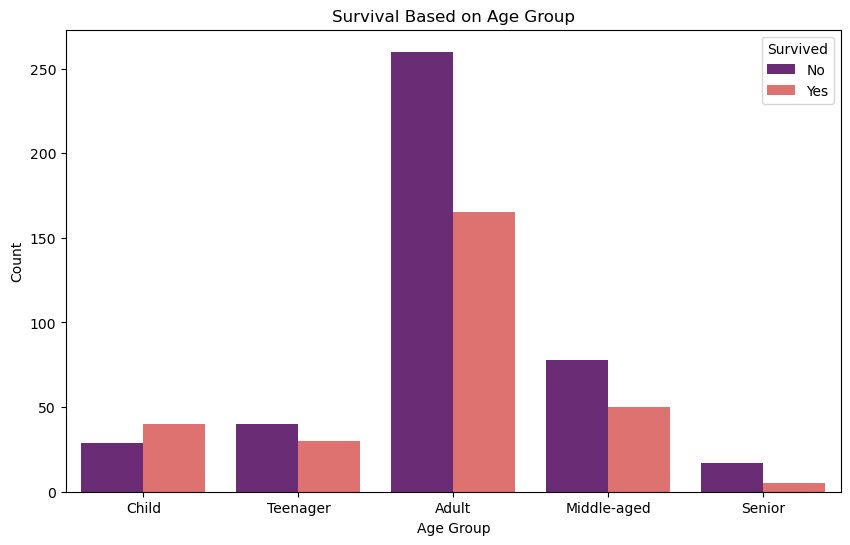

In [17]:
# Create Age Group
bins = [0, 12, 18, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=bins, labels=labels)

# Visualize Survival by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='survived', data=titanic_data, palette='magma')
plt.title('Survival Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Advanced Visualization (Heatmap)

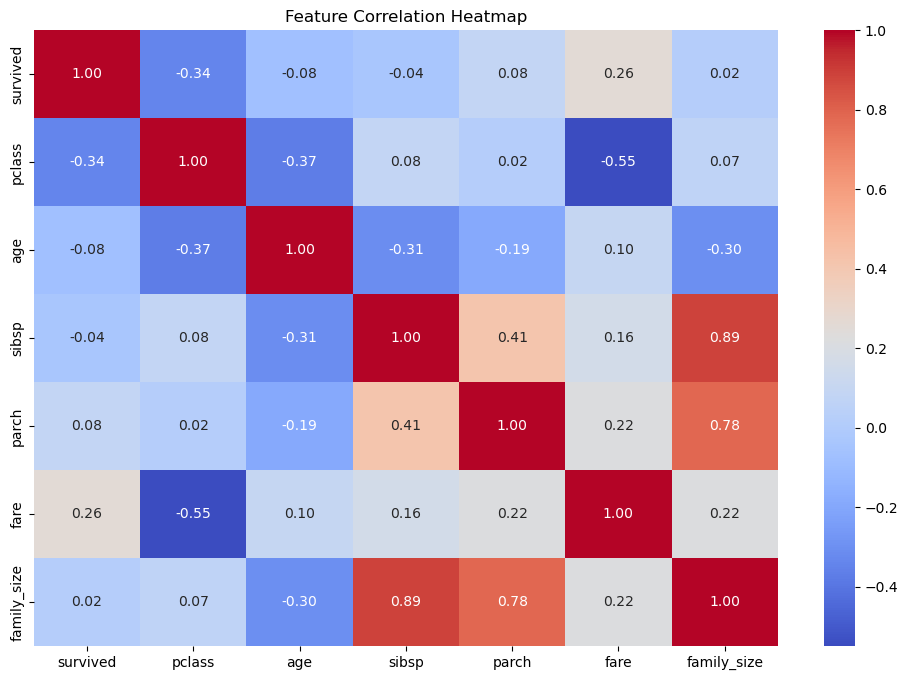

In [18]:
# Correlation heatmap
plt.figure(figsize=(12, 8))

# Select only numeric features for correlation calculation
numeric_features = titanic_data.select_dtypes(include=np.number)
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()